//load data//

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data/retail_store_sales.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    12575 non-null  object 
 1   Customer ID       12575 non-null  object 
 2   Category          12575 non-null  object 
 3   Item              11362 non-null  object 
 4   Price Per Unit    11966 non-null  float64
 5   Quantity          11971 non-null  float64
 6   Total Spent       11971 non-null  float64
 7   Payment Method    12575 non-null  object 
 8   Location          12575 non-null  object 
 9   Transaction Date  12575 non-null  object 
 10  Discount Applied  8376 non-null   object 
dtypes: float64(3), object(8)
memory usage: 1.1+ MB


,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


//data cleaning// 

In [25]:
df.isnull().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

//convert date column to date time 

In [28]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
print(df['Transaction Date'].head(10))

0   2024-04-08
1   2023-07-23
2   2022-10-05
3   2022-05-07
4   2022-10-02
5   2023-11-30
6   2023-06-10
7   2024-04-02
8   2023-04-26
9   2024-03-14
Name: Transaction Date, dtype: datetime64[ns]


//data exploration//

In [30]:
print(df.describe())

       Price Per Unit      Quantity   Total Spent  \
count    11966.000000  11971.000000  11971.000000   
mean        23.365912      5.536380    129.652577   
min          5.000000      1.000000      5.000000   
25%         14.000000      3.000000     51.000000   
50%         23.000000      6.000000    108.500000   
75%         33.500000      8.000000    192.000000   
max         41.000000     10.000000    410.000000   
std         10.743519      2.857883     94.750697   

                    Transaction Date  
count                          12575  
mean   2023-07-12 20:23:41.105368064  
min              2022-01-01 00:00:00  
25%              2022-09-30 00:00:00  
50%              2023-07-13 00:00:00  
75%              2024-04-24 00:00:00  
max              2025-01-18 00:00:00  
std                              NaN  


//create new column//

In [33]:
df['Total sales'] = df['Quantity']*df['Price Per Unit']
print(df['Total sales'].head(10))

0    185.0
1    261.0
2     43.0
3    247.5
4     87.5
5      NaN
6     40.0
7      NaN
8     27.5
9    109.5
Name: Total sales, dtype: float64


//eda and insights//

In [34]:
print(df.groupby('Category')['Total sales'].sum())

Category
Beverages                             187978.5
Butchers                              197426.0
Computers and electric accessories    180902.5
Electric household essentials         192441.5
Food                                  184645.0
Furniture                             186527.0
Milk Products                         170747.5
Patisserie                            172330.5
Name: Total sales, dtype: float64


//top 5 products with most revenue

In [ ]:
print(df.groupby('Item')['Total sales'].sum().sort_values(ascending=False).head(15))

Item
Item_25_FUR     25256.0
Item_25_EHE     23083.0
Item_25_BUT     21894.0
Item_24_FUR     21172.0
Item_25_FOOD    20541.0
Item_22_BUT     19710.0
Item_23_BUT     19114.0
Item_20_BUT     18860.5
Item_19_MILK    18848.0
Item_23_EHE     18468.0
Item_23_PAT     18354.0
Item_19_CEA     17856.0
Item_25_BEV     17794.0
Item_20_FOOD    17487.0
Item_16_MILK    17242.5
Name: Total sales, dtype: float64


In [39]:
print(df['Payment Method'].value_counts())


Payment Method
Cash              4310
Digital Wallet    4144
Credit Card       4121
Name: count, dtype: int64


//visualization

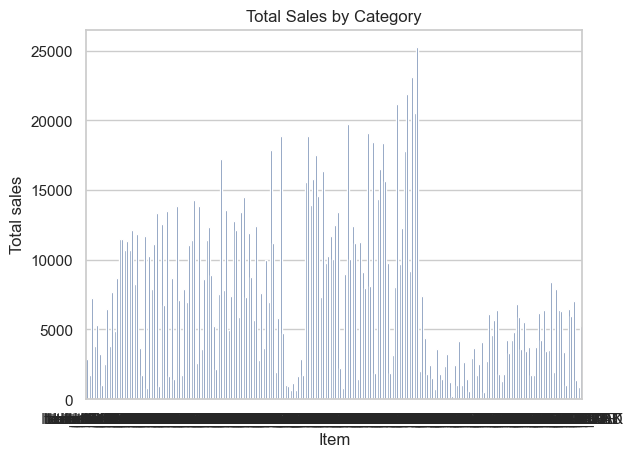

In [40]:
sales_by_category = df.groupby('Item')['Total sales'].sum().reset_index()
sns.barplot(x='Item', y='Total sales', data=sales_by_category)
plt.title('Total Sales by Category')
plt.show()


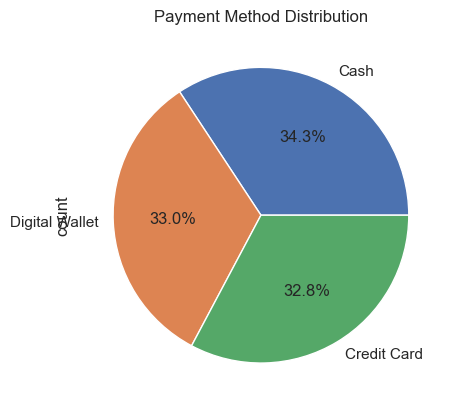

In [43]:
df['Payment Method'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.show()


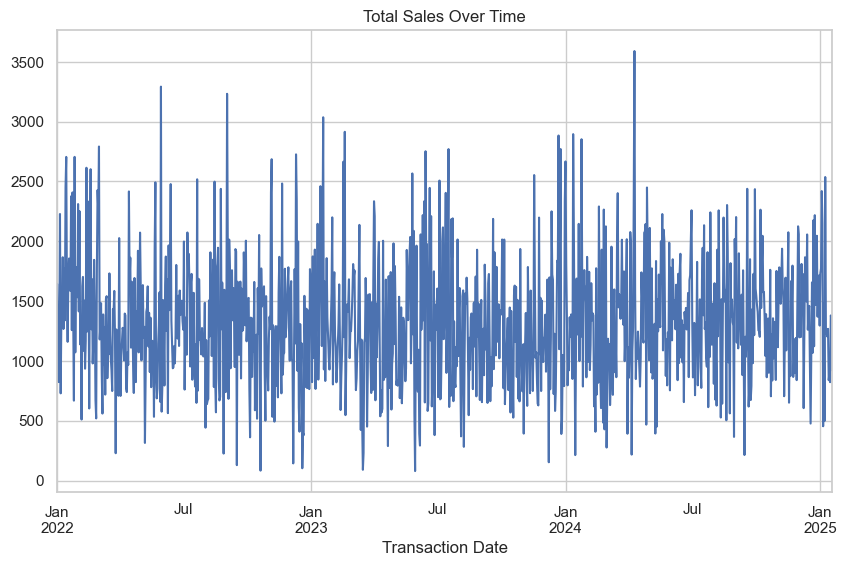

In [45]:
sales_over_time = df.groupby('Transaction Date')['Total sales'].sum()
sales_over_time.plot(figsize=(10,6))
plt.title('Total Sales Over Time')
plt.show()
